# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool, Process
import psutil
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import miscFunc
from concurrent.futures import ThreadPoolExecutor
import concurrent


def pool_process(f, data, pool_size, num_repetitions=5, show_results=False):
    """
    A function for timing a job that uses a pool of processes.
    
    Args
    ----
        f: function
            A function that takes a single argumnet
        data: iterable
            An array of arguments on which f will be mapped
        pool_size: int
            Number of processes in the pool
        num_reptitions: int, default 5
            The number of times to call f for each pool size. The times are then averaged
        show_results: Boolean, default False
            Show the result from calling f
    """
    total_time = 0
    
    for i in range(num_repetitions):
        tp1 = time.time()

        # initialize the Pool
        pool = Pool(processes=pool_size)

        # map f to the data using the Pool of processes to do the work 
        result = pool.map(f, data)       

        # No more processes
        pool.close()
        # Wait for the pool processing to complete.
        pool.join() 
        overall_time = time.time() - tp1

        if show_results:
            print("Results", result)

        total_time += overall_time

    avg_time = total_time / num_repetitions
    print(f"Average time over {num_repetitions} runs: {avg_time}")

    return avg_time

def plot_runtimes_and_speedup(runtimes, pool_sizes):
    """
    Function to take an array of runtimes and pool sizes and plot the runtimes as a bar chart 
    and the speedup as a line on the same plot. The length of the runtimes and the pool_sizes 
    should be the same.
    
    Args
    ---
        runtimes: iterable
            An array of runtimes 
        pool_size: iterable
            An array of pool sizes
    """
    
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    plt.ylabel("Time (seconds)")
    plt.xlabel("Processes")
    plt.xticks(pool_sizes)

    # Plot the runtimes as a bar chat
    times_bar_chart = ax.bar(np.array(pool_sizes), runtimes, label="Runtime (seconds)")

    # Plot the speedup as a line
    speedups = np.array(runtimes)[0] / np.array(runtimes) 
    axes2 = plt.twinx()
    speedup_line = axes2.plot(np.array(pool_sizes), speedups, color='red', label="Speedup relative to 1 process")

    # Put the speedup values on the line
    for x,y in zip(pool_sizes, speedups):
        axes2.annotate(f"{y:.2f}x", xy=(x, y))
    axes2.set_ylabel("Speedup")

    labels = [l.get_label() for l in [times_bar_chart, speedup_line[0]]]
    plt.legend([times_bar_chart, speedup_line[0]], labels, loc=0)
    
    return plt

This notebook was run on a MacBook Air 2020 with the M1 chip with 8 cores.

In [9]:
psutil.cpu_count(logical=False)

8

However, I test on up to 12 processes in most cases to see if trying to use more processes than available cores reduces performance.

In [10]:
pool_sizes = range(1, 13)

## Question 1

#### Small range of numbers
Test a list of just 100 numbers to see if the cost of multiprocessing outweighs the benefit

Pool Size: 1
Average time over 5 runs: 0.13245978355407714

Pool Size: 2
Average time over 5 runs: 0.13473234176635743

Pool Size: 3
Average time over 5 runs: 0.15031590461730956

Pool Size: 4
Average time over 5 runs: 0.16658306121826172

Pool Size: 5
Average time over 5 runs: 0.19546895027160643

Pool Size: 6
Average time over 5 runs: 0.21874089241027833

Pool Size: 7
Average time over 5 runs: 0.24758167266845704

Pool Size: 8
Average time over 5 runs: 0.2670403480529785

Pool Size: 9
Average time over 5 runs: 0.2970310688018799

Pool Size: 10
Average time over 5 runs: 0.35674080848693845

Pool Size: 11
Average time over 5 runs: 0.38620820045471194

Pool Size: 12
Average time over 5 runs: 0.41783342361450193



<module 'matplotlib.pyplot' from '/Users/paulreidy/opt/anaconda3/envs/comp30830/lib/python3.9/site-packages/matplotlib/pyplot.py'>

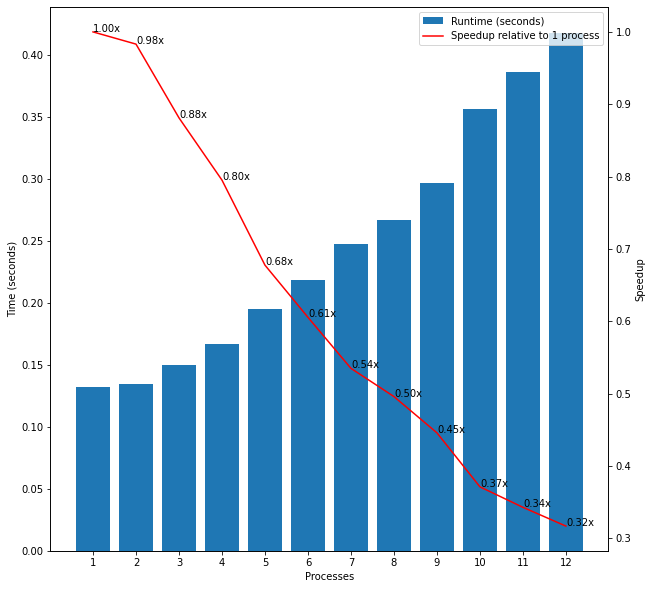

In [12]:
experiment_1 = range(100)
experiment_1_runtimes = []

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}") 
    runtime = pool_process(miscFunc.check_prime, experiment_1, pool_size, show_results=False)
    experiment_1_runtimes.append(runtime)
    print()
    
plot_runtimes_and_speedup(experiment_1_runtimes, pool_sizes)

#### Large Range of Numbers
Test a list of 100,000 numbers to see if multiprocessing benefits are clearer for this input

Pool Size: 1
Average time over 5 runs: 25.17792167663574

Pool Size: 2
Average time over 5 runs: 14.29152340888977

Pool Size: 3
Average time over 5 runs: 11.40073528289795

Pool Size: 4
Average time over 5 runs: 9.411906242370605

Pool Size: 5
Average time over 5 runs: 8.843995571136475

Pool Size: 6
Average time over 5 runs: 8.3218514919281

Pool Size: 7
Average time over 5 runs: 7.640187311172485

Pool Size: 8
Average time over 5 runs: 7.231078577041626

Pool Size: 9
Average time over 5 runs: 7.294075298309326

Pool Size: 10
Average time over 5 runs: 7.457649040222168

Pool Size: 11
Average time over 5 runs: 7.3705747604370115

Pool Size: 12
Average time over 5 runs: 7.244255065917969



Text(0.5, 1.0, 'Figure 1')

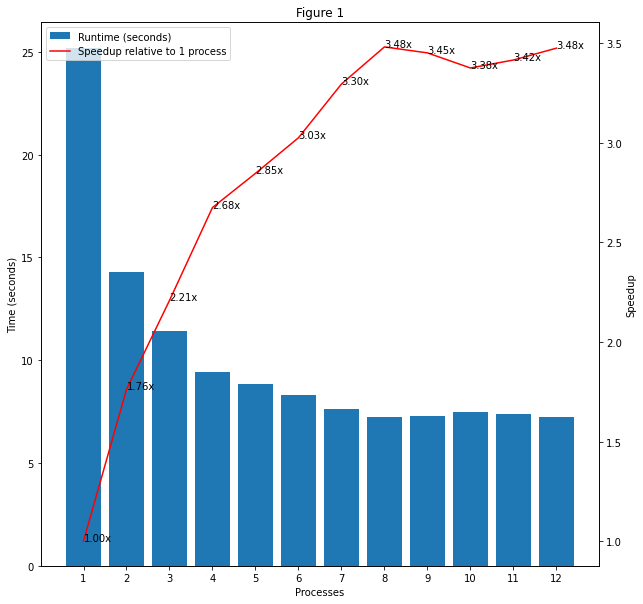

In [13]:
# A big range of numbers starting from 100,000
experiment_2 = range(100000)
experiment_2_runtimes = []

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}") 
    runtime = pool_process(miscFunc.check_prime, experiment_2, pool_size, show_results=False)
    experiment_2_runtimes.append(runtime)
    print()
    
experiment2_plt = plot_runtimes_and_speedup(experiment_2_runtimes, pool_sizes)
experiment2_plt.title("Figure 1")

#### Large Range of Even Numbers
Test a big range of even numbers which should complete very quickly since none of them are prime and all divide evenly by 2

Pool Size: 1
Average time over 5 runs: 0.3671098232269287

Pool Size: 2
Average time over 5 runs: 0.27571840286254884

Pool Size: 3
Average time over 5 runs: 0.2622025966644287

Pool Size: 4
Average time over 5 runs: 0.25845489501953123

Pool Size: 5
Average time over 5 runs: 0.27862110137939455

Pool Size: 6
Average time over 5 runs: 0.32279291152954104

Pool Size: 7
Average time over 5 runs: 0.3429436683654785

Pool Size: 8
Average time over 5 runs: 0.3668337821960449

Pool Size: 9
Average time over 5 runs: 0.3952827453613281

Pool Size: 10
Average time over 5 runs: 0.48000731468200686

Pool Size: 11
Average time over 5 runs: 0.48343815803527834

Pool Size: 12
Average time over 5 runs: 0.5386935234069824



<module 'matplotlib.pyplot' from '/Users/paulreidy/opt/anaconda3/envs/comp30830/lib/python3.9/site-packages/matplotlib/pyplot.py'>

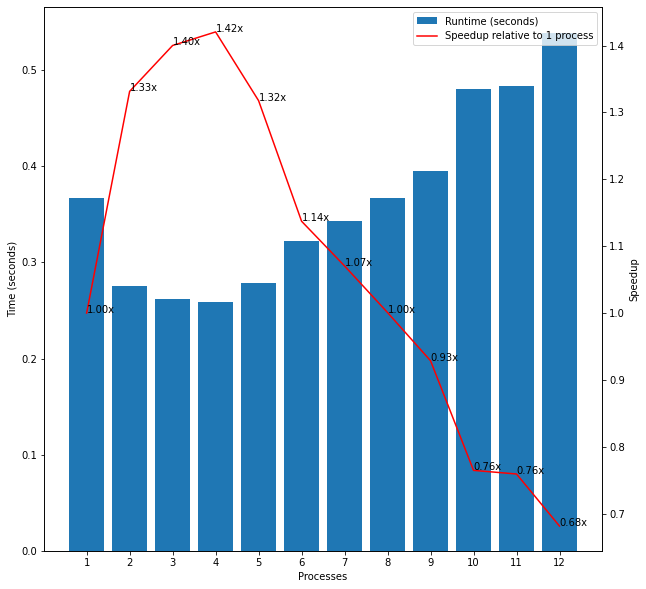

In [14]:
experiment_3 = range(2, 1000000, 2)
experiment_3_runtimes = []

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}") 
    runtime = pool_process(miscFunc.check_prime, experiment_3, pool_size, show_results=False)
    experiment_3_runtimes.append(runtime)
    print()

plot_runtimes_and_speedup(experiment_3_runtimes, pool_sizes)

#### Small lists of big primes
Test on inputs of big primes (at least 8 digits) as suggested in description

In [15]:
five_large_primes = [15485863, 15485867, 32452843, 32452867, 49979687]
five_primes_runtimes = []
ten_large_primes = five_large_primes + [49979693, 67867967, 67867979, 86028121, 86028157]
ten_primes_runtimes = []
fifteen_primes_runtimes = []
fifteen_large_primes = ten_large_primes + [104395301, 104395303, 122949823, 122949829, 141650939]

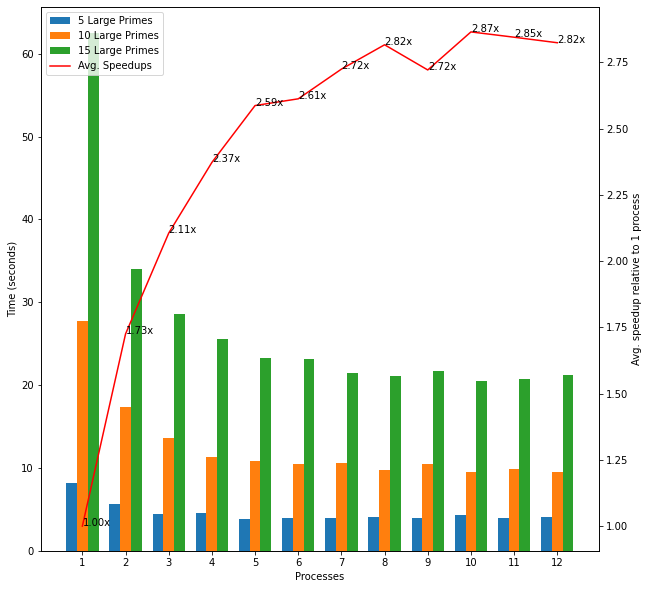

In [15]:
for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}")

    runtime = pool_process(miscFunc.check_prime, five_large_primes, pool_size)
    five_primes_runtimes.append(runtime)
    
    runtime = pool_process(miscFunc.check_prime, ten_large_primes, pool_size)
    ten_primes_runtimes.append(runtime)
    
    runtime = pool_process(miscFunc.check_prime, fifteen_large_primes, pool_size)
    fifteen_primes_runtimes.append(runtime)
    
    print()

total_runtimes = np.array(five_primes_runtimes) + np.array(ten_primes_runtimes) + np.array(fifteen_primes_runtimes)
avg_runtimes = total_runtimes / 3
print(avg_runtimes)

# Not using plot_runtimes_and_speedup here because I want to customise the plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.ylabel("Time (seconds)")
plt.xlabel("Processes")
plt.xticks(pool_sizes)

speedups = np.array(avg_runtimes)[0] / np.array(avg_runtimes) 

width = 0.25  # the width of the bars
rects1 = ax.bar(np.array(pool_sizes) - width, five_primes_runtimes, width, label='5 Large Primes')
rects2 = ax.bar(np.array(pool_sizes), ten_primes_runtimes, width, label='10 Large Primes')
rects3 = ax.bar(np.array(pool_sizes) + width, fifteen_primes_runtimes, width, label='15 Large Primes')

axes2 = plt.twinx()
speedup_line = axes2.plot(np.array(pool_sizes), speedups, color='red', label="Avg. Speedups")
for x,y in zip(pool_sizes, speedups):
    axes2.annotate(f"{y:.2f}x", xy=(x, y))
axes2.set_ylabel("Avg. speedup relative to 1 process")

labels = [l.get_label() for l in [rects1, rects2, rects3, speedup_line[0]]]
plt.legend([rects1, rects2, rects3, speedup_line[0]], labels, loc=0)

#### One Large Prime Number
Do we see any benefits from multiprocessing when looking at one extremely large prime number?

Pool Size: 1
Average time over 5 runs: 26.831612491607665

Pool Size: 2
Average time over 5 runs: 26.17342791557312

Pool Size: 3
Average time over 5 runs: 26.28872413635254

Pool Size: 4
Average time over 5 runs: 27.130464792251587

Pool Size: 5
Average time over 5 runs: 26.306665563583373

Pool Size: 6
Average time over 5 runs: 26.417154598236085

Pool Size: 7
Average time over 5 runs: 26.611909055709837

Pool Size: 8
Average time over 5 runs: 26.637815761566163

Pool Size: 9
Average time over 5 runs: 26.631632566452026

Pool Size: 10
Average time over 5 runs: 26.583310508728026

Pool Size: 11
Average time over 5 runs: 26.352307415008546

Pool Size: 12
Average time over 5 runs: 26.457041645050047



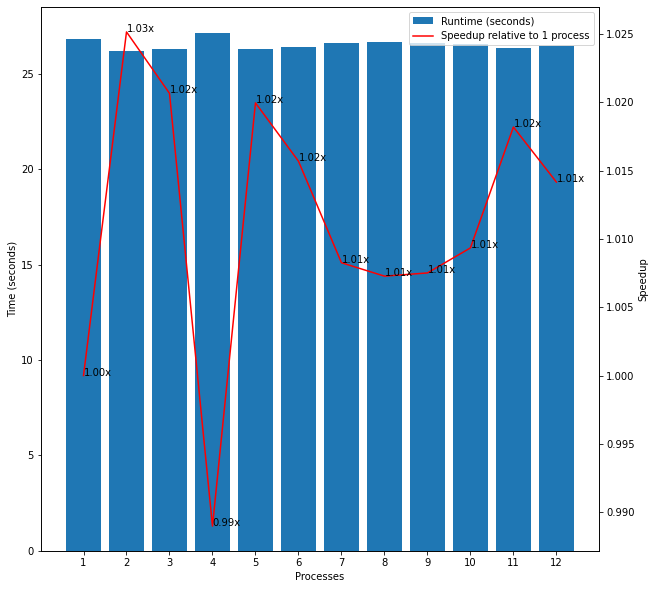

In [16]:
one_large_prime = [472882027]
test_runtimes = []

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}") 
    runtime = pool_process(miscFunc.check_prime, one_large_prime, pool_size, show_results=False)
    test_runtimes.append(runtime)
    print()

plot_runtimes_and_speedup(test_runtimes, pool_sizes)

#### Combining Large Primes with Big List of Even Numbers
Does multiprocessing help when we have a highly uneven workload? For example, a big list of even numbers which should complete quickly combined with fifteen large primes which will take a long time to complete.

Pool Size: 1
Average time over 5 runs: 63.128848695755

Pool Size: 2
Average time over 5 runs: 61.62724366188049

Pool Size: 3
Average time over 5 runs: 60.867140436172484

Pool Size: 4
Average time over 5 runs: 61.680997133255005

Pool Size: 5
Average time over 5 runs: 61.72243490219116

Pool Size: 6
Average time over 5 runs: 61.07859306335449

Pool Size: 7
Average time over 5 runs: 62.16230745315552

Pool Size: 8
Average time over 5 runs: 60.65060095787048

Pool Size: 9
Average time over 5 runs: 61.147777795791626

Pool Size: 10
Average time over 5 runs: 61.174180841445924

Pool Size: 11
Average time over 5 runs: 61.64006948471069

Pool Size: 12
Average time over 5 runs: 60.874608278274536



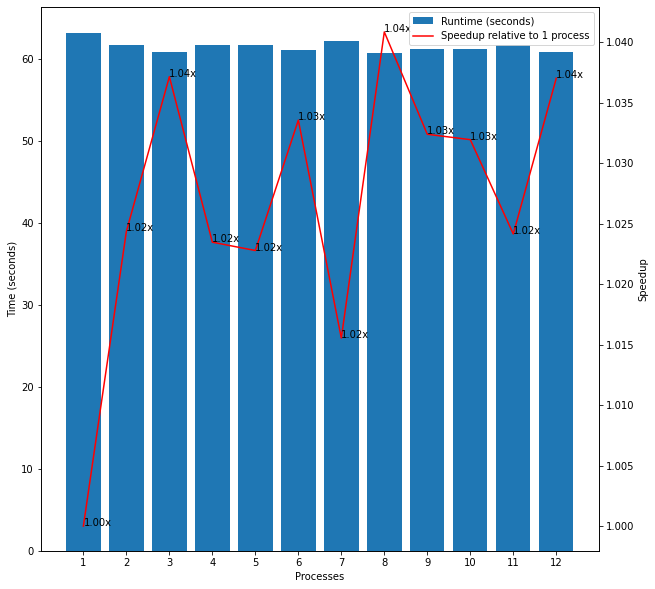

In [20]:
even_numbers_plus_big_primes = list(range(2, 1000000, 2)) + fifteen_large_primes

test_runtimes = []

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}") 
    runtime = pool_process(miscFunc.check_prime, even_numbers_plus_big_primes, pool_size, show_results=False)
    test_runtimes.append(runtime)
    print()

plot_runtimes_and_speedup(test_runtimes, pool_sizes)

Will multiprocessing work better if we shuffle the input so it doesn't gather on one process?

Pool Size: 1
Average time over 5 runs: 60.969402647018434

Pool Size: 2
Average time over 5 runs: 36.52708010673523

Pool Size: 3
Average time over 5 runs: 27.862248182296753

Pool Size: 4
Average time over 5 runs: 23.55795316696167

Pool Size: 5
Average time over 5 runs: 24.66564416885376

Pool Size: 6
Average time over 5 runs: 22.30808753967285

Pool Size: 7
Average time over 5 runs: 23.750682067871093

Pool Size: 8
Average time over 5 runs: 21.20190258026123

Pool Size: 9
Average time over 5 runs: 19.67783694267273

Pool Size: 10
Average time over 5 runs: 19.32293109893799

Pool Size: 11
Average time over 5 runs: 20.39816870689392

Pool Size: 12
Average time over 5 runs: 20.54507803916931



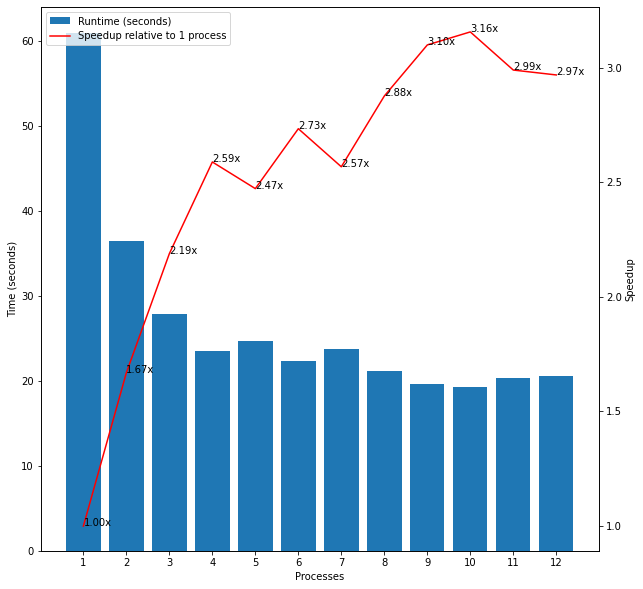

In [21]:
even_numbers_plus_big_primes = list(range(2, 1000000, 2)) + fifteen_large_primes
random.shuffle(even_numbers_plus_big_primes)

test_runtimes = []

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}") 
    runtime = pool_process(miscFunc.check_prime, even_numbers_plus_big_primes, pool_size, show_results=False)
    test_runtimes.append(runtime)
    print()

plot_runtimes_and_speedup(test_runtimes, pool_sizes)

#### Multiprocessing vs. Multithreading
Multithreading is not recommended in Python for CPU intensive tasks because of the GIL. The code below tests if that is a good recommendation.

Pool Size: 1
Average time over 5 runs: 27.723419284820558
Average time over 5 runs: 27.918123626708983

Pool Size: 2
Average time over 5 runs: 17.32412886619568
Average time over 5 runs: 27.720147228240968

Pool Size: 3
Average time over 5 runs: 12.445032024383545
Average time over 5 runs: 27.68265380859375

Pool Size: 4
Average time over 5 runs: 10.398402643203735
Average time over 5 runs: 27.46656279563904

Pool Size: 5
Average time over 5 runs: 10.298867893218993
Average time over 5 runs: 27.430216693878172

Pool Size: 6
Average time over 5 runs: 9.585951137542725
Average time over 5 runs: 27.708303117752074

Pool Size: 7
Average time over 5 runs: 9.801888179779052
Average time over 5 runs: 27.71370663642883

Pool Size: 8
Average time over 5 runs: 8.859645509719849
Average time over 5 runs: 27.66634073257446



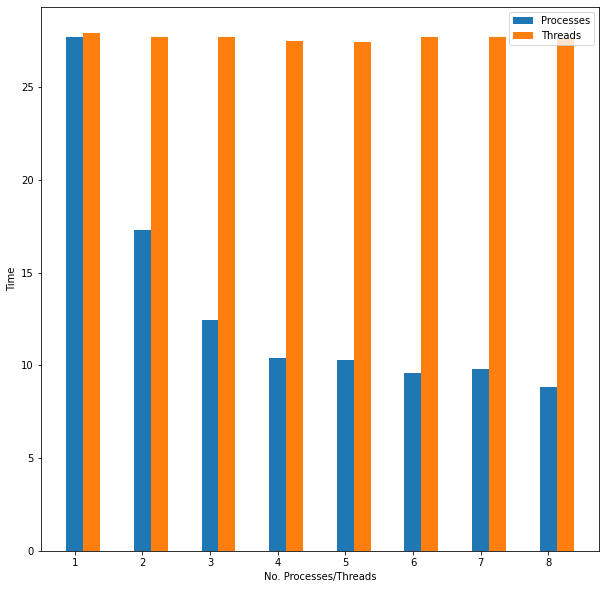

In [27]:
def thread_pool(f, data, pool_size, num_repetitions=5, show_results=False):
    """
    This function is very similar to pool_process except is uses threads instead of processes.
        
    Args
    ----
        f: function
            A function that takes a single argumnet
        data: iterable
            An array of arguments on which f will be mapped
        pool_size: int
            Number of threads in the pool
        num_reptitions: int, default 5
            The number of times to call f for each pool size. The times are then averaged
        show_results: Boolean, default False
            Show the result from calling f
    """
    
    total_time = 0
    
    for i in range(num_repetitions):
        tp1 = time.time() 

        # intialize the Pool
        pool = ThreadPoolExecutor(max_workers=pool_size)

        with concurrent.futures.ThreadPoolExecutor(max_workers=pool_size) as executor:
            executor.map(f, data)

        total_time += time.time() - tp1
        
    avg_time = total_time / num_repetitions    
    print(f"Average time over {num_repetitions} runs: {avg_time}")
    return avg_time

ten_primes_runtimes_processes = []
ten_primes_runtimes_threads = []

# Go from 1 to 8 threads/processes
pool_sizes = range(1, 9)
for i in pool_sizes:
    print(f"Pool Size: {i}")    
    
    runtime = pool_process(miscFunc.check_prime, ten_large_primes, i)
    ten_primes_runtimes_processes.append(runtime)
    
    runtime = thread_pool(miscFunc.check_prime, ten_large_primes, i)
    ten_primes_runtimes_threads.append(runtime)
    
    print()
    
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.ylabel("Time")
plt.xlabel("No. Processes/Threads")
plt.xticks(pool_sizes)

width = 0.25  # the width of the bars
rects1 = ax.bar(np.array(pool_sizes), ten_primes_runtimes_processes, width, label='Processes')
rects2 = ax.bar(np.array(pool_sizes) + width, ten_primes_runtimes_threads, width, label='Threads')
plt.legend()

#### Pool vs. Process
Python has `Pool` and `Process` classes in the `multiprocessing` module. The code below tests their reported strengths and weaknesses.

In [3]:
def nonpool_process(f, data, num_processes, num_repetitions=5):
    """
    Similar to pool_process except is uses Process class instead of Pool class
    
    Args
    ----
        f: function
            A function that takes a single argumnet
        data: iterable
            An array of arguments on which f will be mapped
        num_processes: int
            Number of instances of Process
        num_reptitions: int, default 5
            The number of times to call f for each pool size. The times are then averaged
    """
    
    procs = []
    # Need to manually split up the data for Process
    chunks = np.array_split(np.array(data), i)

    tp1 = time.time()
    for j in range(i):
        p = Process(target=miscFunc.check_prime_list, args=(chunks[j].tolist(), True))
        procs.append(p)
        p.start()

    for p in procs:
        p.join()

    overall_time = time.time() - tp1
    print("Overall Time for Process class:", overall_time)
    return overall_time

Small number of tasks where each is expected to take long to complete (big primes). This should favour `Process`.

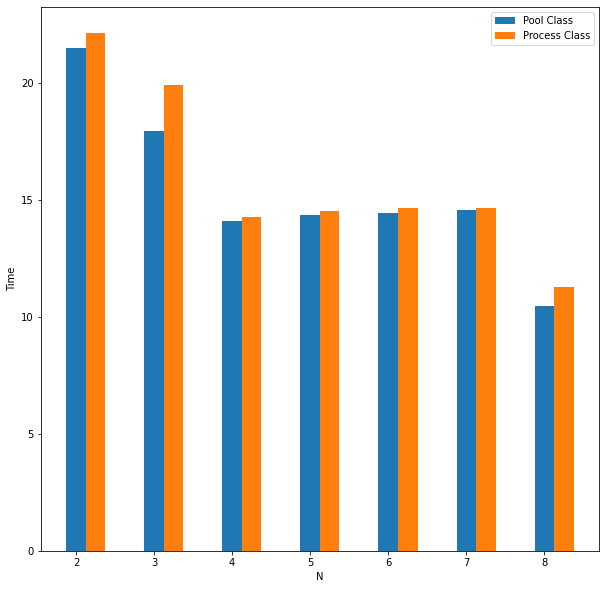

In [31]:
pool_runtimes = []
process_runtimes = []

test = [86028157]*8
 
for i in range(2, 9):
    # Pool
    print(f"Pool Size: {i}")
    runtime = pool_process(miscFunc.check_prime, test, i, num_repetitions=5)
    pool_runtimes.append(runtime)

    # Process
    print(f"Number Processes: {i}")
    runtime = nonpool_process(miscFunc.check_prime_list, test, i, num_repetitions=5)
    process_runtimes.append(runtime)
    print()
    
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.ylabel("Time")
plt.xlabel("N")
plt.xticks(pool_sizes)

width = 0.25  # the width of the bars
rects1 = ax.bar(np.array(range(2, 9)), pool_runtimes, width, label='Pool Class')
rects2 = ax.bar(np.array(range(2, 9)) + width, process_runtimes, width, label='Process Class')
plt.legend()

Large number of tasks where each is expected to complete quickly. A big range of numbers, most of which are not primes. This should favour `Pool`.

Pool Size: 2
Average time over 5 runs: 0.2576812744140625
Number Processes: 2
Overall Time for Process class: 2.2019362449645996

Pool Size: 3
Average time over 5 runs: 0.23531227111816405
Number Processes: 3
Overall Time for Process class: 1.7777719497680664

Pool Size: 4
Average time over 5 runs: 0.2404195785522461
Number Processes: 4
Overall Time for Process class: 1.8413817882537842

Pool Size: 5
Average time over 5 runs: 0.2644024848937988
Number Processes: 5
Overall Time for Process class: 1.8435759544372559

Pool Size: 6
Average time over 5 runs: 0.29252824783325193
Number Processes: 6
Overall Time for Process class: 1.8931713104248047

Pool Size: 7
Average time over 5 runs: 0.3045318126678467
Number Processes: 7
Overall Time for Process class: 1.9473822116851807

Pool Size: 8
Average time over 5 runs: 0.3364150047302246
Number Processes: 8
Overall Time for Process class: 2.0230891704559326



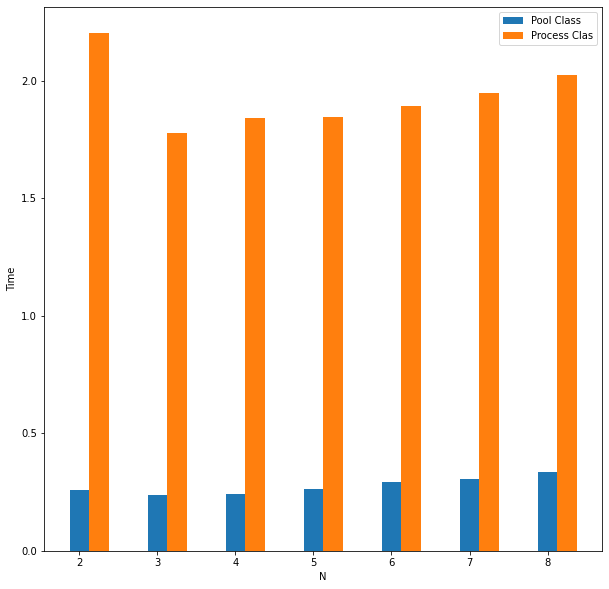

In [5]:
pool_runtimes = []
process_runtimes = []

test = range(2, 1000000, 2)

for i in range(2, 9):
    # Pool
    print(f"Pool Size: {i}")
    runtime = pool_process(miscFunc.check_prime, test, i, num_repetitions=5)
    pool_runtimes.append(runtime)

    # Process 
    print(f"Number Processes: {i}")
    runtime = nonpool_process(miscFunc.check_prime_list, test, i, num_repetitions=5)
    process_runtimes.append(runtime)
    print()
    
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.ylabel("Time")
plt.xlabel("N")
plt.xticks(range(2, 9))

width = 0.25  # the width of the bars
rects1 = ax.bar(np.array(range(2, 9)), pool_runtimes, width, label='Pool Class')
rects2 = ax.bar(np.array(range(2, 9)) + width, process_runtimes, width, label='Process Clas')
plt.legend()

## Question 2: Part (a)

#### Estimate PI

In [20]:
def pool_process_pi(pi_f, data, pool_size, num_repetitions=5, show_results=False):
    """
    Similar to pool_process except it also returns the results as well as the average times so that 
    Pi can be calculated after all multiprocessing is complete
    
    Args
    ----
        pi_f: function
            A function to estimate Pi that takes a single argumnet
        data: iterable
            An array of arguments on which f will be mapped
        num_processes: int
            Number of instances of Process
        num_reptitions: int, default 5
            The number of times to call f for each pool size. The times are then averaged
        show_results: Boolean, default False
            Show the result from calling pi_f
    """
    
    total_time = 0
    
    for i in range(num_repetitions):
        tp1 = time.time()

        # initialize the Pool
        pool = Pool(processes=pool_size)

        # map f to the data using the Pool of processes to do the work 
        counts = pool.map(pi_f, data)       

        # No more processes
        pool.close()
        # Wait for the pool processing to complete.
        pool.join() 
        overall_time = time.time() - tp1

        if show_results:
            print("Results", result)

        total_time += overall_time

    avg_time = total_time / num_repetitions
    print(f"Average time over {num_repetitions} runs: {avg_time}")

    # Return times and results
    return avg_time, counts

Pool Size: 1
Average time over 5 runs: 0.13349685668945313
Estimate of Pi: 2.96

Pool Size: 2
Average time over 5 runs: 0.14788222312927246
Estimate of Pi: 3.28

Pool Size: 3
Average time over 5 runs: 0.16995387077331542
Estimate of Pi: 3.08

Pool Size: 4
Average time over 5 runs: 0.18410801887512207
Estimate of Pi: 3.16

Pool Size: 5
Average time over 5 runs: 0.21080412864685058
Estimate of Pi: 3.16

Pool Size: 6
Average time over 5 runs: 0.2438565731048584
Estimate of Pi: 2.76

Pool Size: 7
Average time over 5 runs: 0.27215962409973143
Estimate of Pi: 3.28

Pool Size: 8
Average time over 5 runs: 0.30601935386657714
Estimate of Pi: 2.92



<module 'matplotlib.pyplot' from '/Users/paulreidy/opt/anaconda3/envs/comp30830/lib/python3.9/site-packages/matplotlib/pyplot.py'>

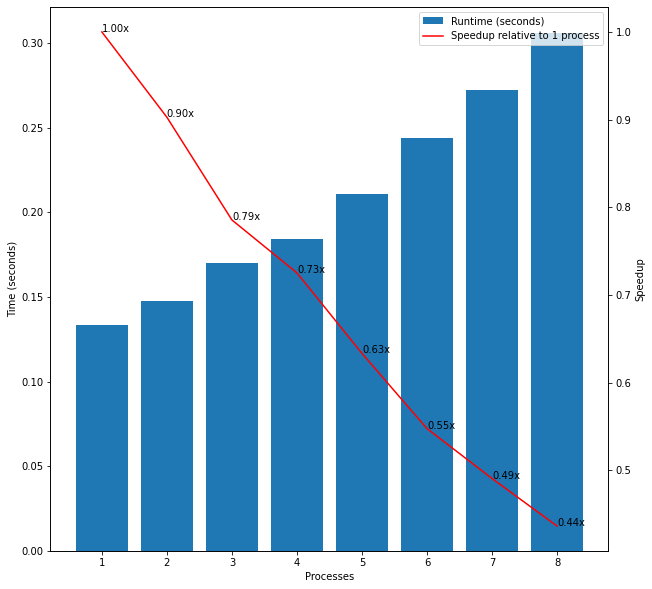

In [21]:
pi_monte_carlo_experiment_1_n_samples = 100
pi_monte_carlo_experiment_1_runtimes = []

for i in pool_sizes:
    print(f"Pool Size: {i}") 
    partitions = []
    for _ in range(i):
        partitions.append(int(pi_monte_carlo_experiment_1_n_samples/i))
            
    runtime, counts = pool_process_pi(miscFunc.pi_monte_carlo, partitions, i, show_results=False)
    circle_pi_estimate = (4.0 * sum(counts) / pi_monte_carlo_experiment_1_n_samples)
    print(f"Estimate of Pi: {circle_pi_estimate}")
    pi_monte_carlo_experiment_1_runtimes.append(runtime)
    print()

plot_runtimes_and_speedup(pi_monte_carlo_experiment_1_runtimes, pool_sizes)

Pool Size: 1
[100000]
Average time over 5 runs: 0.23845534324645995
Estimate of Pi: 3.14236

Pool Size: 2
[50000, 50000]
Average time over 5 runs: 0.206284236907959
Estimate of Pi: 3.14104

Pool Size: 3
[33333, 33333, 33333]
Average time over 5 runs: 0.20597553253173828
Estimate of Pi: 3.14156

Pool Size: 4
[25000, 25000, 25000, 25000]
Average time over 5 runs: 0.2239748001098633
Estimate of Pi: 3.1406

Pool Size: 5
[20000, 20000, 20000, 20000, 20000]
Average time over 5 runs: 0.25038971900939944
Estimate of Pi: 3.1496

Pool Size: 6
[16666, 16666, 16666, 16666, 16666, 16666]
Average time over 5 runs: 0.2728747367858887
Estimate of Pi: 3.14284

Pool Size: 7
[14285, 14285, 14285, 14285, 14285, 14285, 14285]
Average time over 5 runs: 0.3139209747314453
Estimate of Pi: 3.1474

Pool Size: 8
[12500, 12500, 12500, 12500, 12500, 12500, 12500, 12500]
Average time over 5 runs: 0.3491227626800537
Estimate of Pi: 3.14032

Pool Size: 9
[11111, 11111, 11111, 11111, 11111, 11111, 11111, 11111, 11111]

<module 'matplotlib.pyplot' from '/Users/paulreidy/opt/anaconda3/envs/comp30830/lib/python3.9/site-packages/matplotlib/pyplot.py'>

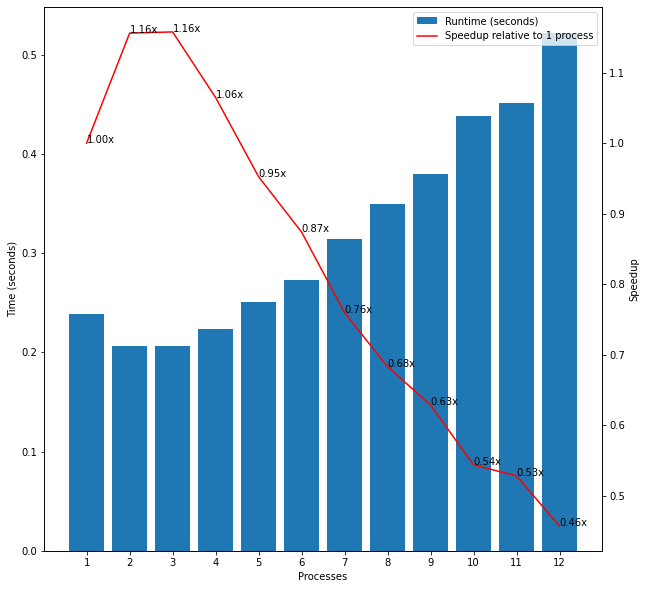

In [22]:
pi_monte_carlo_experiment_2_n_samples = 100000
pi_monte_carlo_experiment_2_runtimes = []

# Go from 1 to 12 processes
pool_sizes = range(1, 13)
for i in pool_sizes:
    print(f"Pool Size: {i}") 
    partitions = []
    for _ in range(i):
        partitions.append(int(pi_monte_carlo_experiment_2_n_samples/i))
    
    print(partitions)
    runtime, counts = pool_process_pi(miscFunc.pi_monte_carlo, partitions, i)
    circle_pi_estimate = (4.0 * sum(counts) / pi_monte_carlo_experiment_2_n_samples)
    print(f"Estimate of Pi: {circle_pi_estimate}")
    pi_monte_carlo_experiment_2_runtimes.append(runtime)
    print()

plot_runtimes_and_speedup(pi_monte_carlo_experiment_2_runtimes, pool_sizes)

#### Monte Carlo vs. BBP

In [23]:
bbp_runtimes = []
monte_carlo_runtimes = []
n_samples = 100000

for pool_size in pool_sizes:
    print(f"Pool Size: {pool_size}")
    
    partitions = []
    for _ in range(pool_size):
        partitions.append(int(n_samples / pool_size))
        
    runtime, counts = pool_process_pi(miscFunc.pi_monte_carlo, partitions, pool_size)
    circle_pi_estimate = (4.0 * sum(counts) / n_samples)
    print(f"Estimate of Pi from Monte Carlo: {circle_pi_estimate}")
    monte_carlo_runtimes.append(runtime)
    print()
    
    runtime, bbp_terms = pool_process_pi(miscFunc.pi_bbp, range(n_samples), pool_size)
    print(f"Estimate of Pi from BBP algorithm: {sum(bbp_terms)}")
    bbp_runtimes.append(runtime)
    print()

Pool Size: 1
Average time over 5 runs: 0.24061784744262696
Estimate of Pi from Monte Carlo: 3.14796

Average time over 5 runs: 51.46922345161438
Estimate of Pi from BBP algorithm: 3.141592653589793

Pool Size: 2
Average time over 5 runs: 0.18650593757629394
Estimate of Pi from Monte Carlo: 3.1394

Average time over 5 runs: 29.162198972702026
Estimate of Pi from BBP algorithm: 3.141592653589793

Pool Size: 3
Average time over 5 runs: 0.18258514404296874
Estimate of Pi from Monte Carlo: 3.14272

Average time over 5 runs: 20.198632049560548
Estimate of Pi from BBP algorithm: 3.141592653589793

Pool Size: 4
Average time over 5 runs: 0.19167141914367675
Estimate of Pi from Monte Carlo: 3.1462

Average time over 5 runs: 16.433051443099977
Estimate of Pi from BBP algorithm: 3.141592653589793

Pool Size: 5
Average time over 5 runs: 0.22107601165771484
Estimate of Pi from Monte Carlo: 3.14716

Average time over 5 runs: 14.963563156127929
Estimate of Pi from BBP algorithm: 3.141592653589793

Poo

Text(0.5, 1.0, 'Bailey–Borwein–Plouffe Pi Estimation with input 100,000')

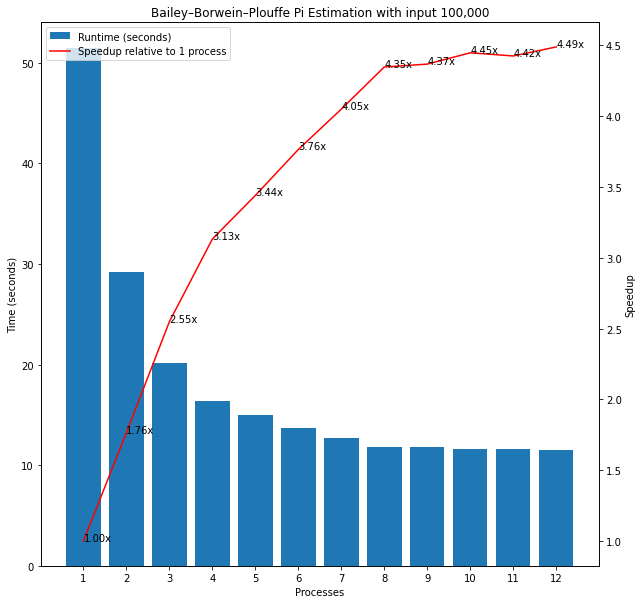

In [24]:
bbp_plt = plot_runtimes_and_speedup(bbp_runtimes, pool_sizes)
bbp_plt.title("Bailey–Borwein–Plouffe Pi Estimation with input 100,000")

Text(0.5, 1.0, 'Monte Carlo Pi Estimation with input 100,000')

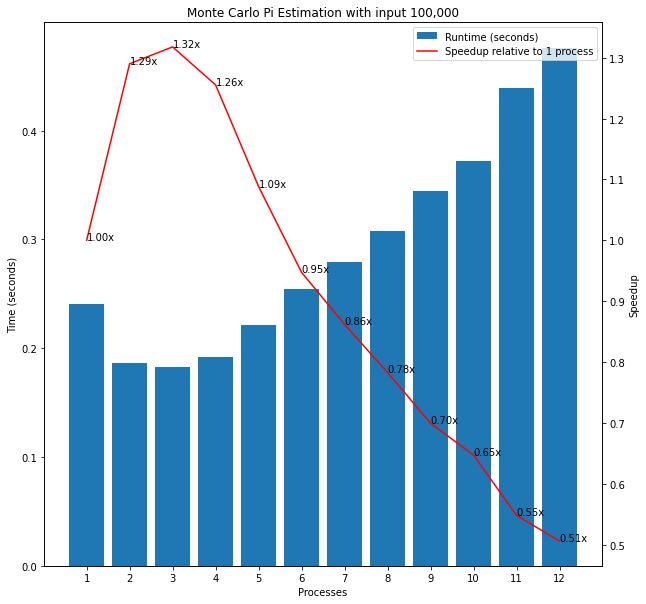

In [25]:
monte_carlo_plt = plot_runtimes_and_speedup(monte_carlo_runtimes, pool_sizes)
monte_carlo_plt.title("Monte Carlo Pi Estimation with input 100,000")